In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
dataset = pd.read_excel('BD Completo.xlsx')
dataset.shape

(377, 70)

<Axes: >

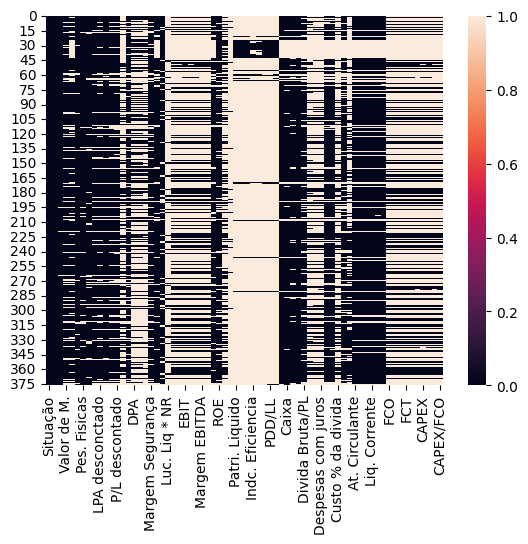

In [141]:
# Tratamento nos valores faltantes
sns.heatmap(dataset.isnull())

In [142]:
pd.set_option('display.max_rows', None)
dataset.isnull().sum()

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA desconctado         60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

In [143]:
# Exibindo o somatório de valores faltantes em todas as colunas
missing_values_count = dataset.isnull().sum()

# Obtendo nomes das colunas com somatório de valores nulos maior que 200
colunas_a_excluir = missing_values_count[missing_values_count > 200].index.tolist()
print(len(colunas_a_excluir))
print(colunas_a_excluir)
colunas_a_excluir = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'Patri. Liquido', 'RIF', 'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD', 'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI', 'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 'Majoritar.']



# Excluindo as colunas do DataFrame
dataset.drop(labels=colunas_a_excluir, axis=1, inplace=True)

37
['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'Patri. Liquido', 'RIF', 'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD', 'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI', 'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO']


In [144]:
dataset.shape

(377, 32)

In [145]:
# Selecionando apenas as colunas numéricas do DataFrame
numeric_columns = dataset.select_dtypes(include=[np.number])

# Preenchendo os valores nulos com a média das colunas numéricas
dataset[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

# Verificando novamente o somatório de valores nulos em cada coluna
print(dataset.isnull().sum())

Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64


In [146]:
dataset.dropna(inplace=True)
dataset.shape

(347, 32)

In [147]:
pd.set_option('display.max.rows', 10)

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 17  RO

<Axes: xlabel='Situação', ylabel='count'>

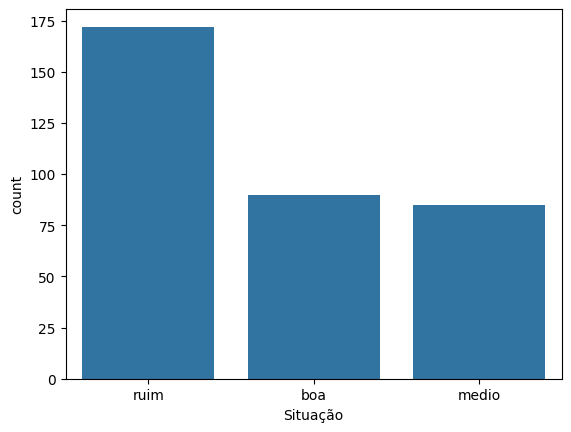

In [149]:
sns.countplot(x = dataset['Situação'])

In [150]:
np.unique(dataset['Situação'], return_counts=True)

(array(['boa', 'medio', 'ruim'], dtype=object),
 array([ 90,  85, 172], dtype=int64))

In [151]:
#dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

In [152]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2], dtype=int64))

In [153]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento
    

In [154]:
corrige_segmento('tansporte aereo')

'transporte aereo'

In [155]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [156]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

In [157]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2], dtype=int64))

In [158]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'
    else:
        categoria = texto
    
    return categoria


In [159]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2], dtype=int64))

<Axes: xlabel='Categoria', ylabel='count'>

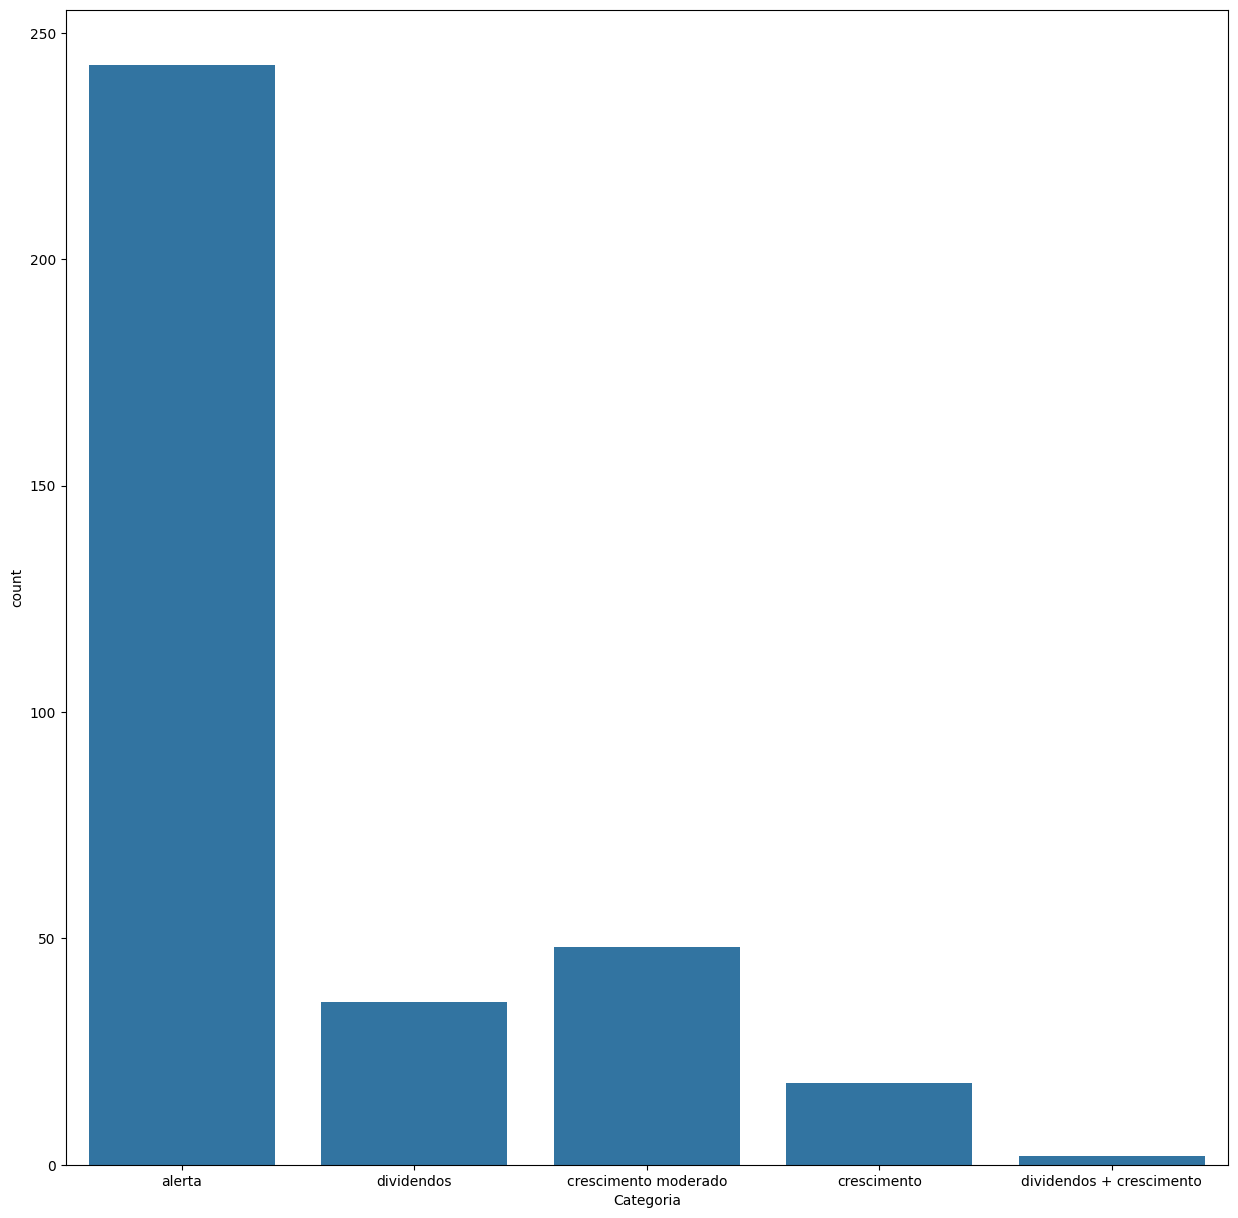

In [160]:
plt.figure(figsize=(15,15))
sns.countplot(x = dataset['Categoria'])

In [161]:
dataset.describe()

,Valor de M.,EV,Pes. Fisicas,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
count,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,8.803913e+09,1.045164e+10,2.226064e+04,-7.862101,-9.044851,38.573753,11.139852,12.873580,1.532269,-8.271226e+03,...,1.763929,29.440006,38.957579,60.010565,3419.550616,2637.292240,1337.298603,2.068703,1.029286,772.802867
std,2.715437e+10,3.435244e+10,1.309892e+05,65.493749,64.456790,842.780784,85.152313,81.671064,2.677774,7.839801e+04,...,4.358198,145.468109,23.070951,412.828926,9719.816539,6880.722470,4362.187061,2.903694,2.563236,4676.082846
min,6.750600e+04,-2.623695e+07,1.000000e+00,-806.670000,-806.660000,-3804.860000,-866.700000,-312.210000,-15.600000,-1.079664e+06,...,0.000000,-1920.000000,0.000000,1.010000,0.000000,1.000000,0.000000,0.000000,0.000000,-34042.000000
25%,1.651804e+08,3.716960e+08,5.805000e+02,-2.030000,-5.680000,2.695000,-0.615000,-0.555000,0.475000,-8.590000e+02,...,0.505000,21.500000,22.000000,1.950000,232.000000,203.500000,40.500000,0.970000,0.170000,-1.500000
50%,1.362357e+09,3.583574e+09,1.773000e+03,0.130000,0.086000,9.470000,8.830000,9.580000,1.130000,-8.100000e+01,...,1.110000,31.000000,38.872065,3.030000,1307.000000,1022.000000,455.000000,1.660000,0.600000,243.000000
75%,8.596999e+09,1.021776e+10,6.354500e+03,1.185000,1.060000,22.565000,14.765000,14.840000,1.700000,-1.555000e+00,...,1.720811,52.500000,51.500000,43.680000,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481
max,2.866893e+11,4.998736e+11,1.803724e+06,200.660000,160.780000,14896.470000,861.240000,952.660000,24.760000,1.344470e+05,...,68.000000,1197.000000,100.000000,6723.190000,145907.000000,81167.000000,71664.000000,30.750000,30.500000,64740.000000


In [162]:
dataset[dataset['LPA'] == -806.670000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,...,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


In [163]:
dataset[dataset['LPA'] == 200.660000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
254,ruim,minasmaquinas s.a mmaq,material de transporte,8.596999e+09,1.021776e+10,1055.0,alerta,200.66,-8.723009,1605.35,...,0.31,18.0,100.0,1.49,130.0,51.0,47.0,2.55,0.92,79.0


In [164]:
dataset[dataset['LPA desconctado'] == 160.780000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
194,ruim,hercules s.a fabrica de talheres heta,utensilios domesticos,2121596.0,307121596.0,592.0,alerta,160.78,160.78,-656.86,...,1.720811,-360.0,25.0,62.646871,1.0,8.0,0.0,0.13,0.0,-7.0


In [165]:
dataset[dataset['Caixa'] == -0.125000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
376,ruim,524 participações s.a,outros,8.596999e+09,1.021776e+10,1.0,alerta,-7.560357,-8.723009,37.412006,...,1.720811,30.548746,38.872065,62.646871,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481


In [166]:
dataset[dataset['Caixa'] == 59223.000000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
284,boa,petroleo brasileiro s.a petrobras petr,"exploração, refino e distribuição",1.857536e+11,4.998736e+11,288002.0,alerta,-1.0,0.9,19.37,...,0.92,44.0,10.0,3.33,145907.0,81167.0,71664.0,1.8,0.88,64740.0


In [167]:
dataset[dataset['Divida Liquida'] == 199245.000000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
284,boa,petroleo brasileiro s.a petrobras petr,"exploração, refino e distribuição",1.857536e+11,4.998736e+11,288002.0,alerta,-1.0,0.9,19.37,...,0.92,44.0,10.0,3.33,145907.0,81167.0,71664.0,1.8,0.88,64740.0


C:\Users\tdw07\AppData\Local\Temp\ipykernel_12972\585804924.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=eixo)


array([[<Axes: title={'center': 'Valor de M.'}>,
        <Axes: title={'center': 'EV'}>,
        <Axes: title={'center': 'Pes. Fisicas'}>,
        <Axes: title={'center': 'LPA'}>,
        <Axes: title={'center': 'LPA desconctado'}>],
       [<Axes: title={'center': 'VPA'}>, <Axes: title={'center': 'P/L'}>,
        <Axes: title={'center': 'P/L descontado'}>,
        <Axes: title={'center': 'P/VPA'}>,
        <Axes: title={'center': 'Margem Segurança'}>],
       [<Axes: title={'center': 'Rec. Liquida'}>,
        <Axes: title={'center': 'Luc. Liquido'}>,
        <Axes: title={'center': 'Margem Liquida'}>,
        <Axes: title={'center': 'ROE'}>,
        <Axes: title={'center': 'Patri. Liquido.1'}>],
       [<Axes: title={'center': 'Caixa'}>,
        <Axes: title={'center': 'Divida bruta'}>,
        <Axes: title={'center': 'Divida Liquida'}>,
        <Axes: title={'center': 'Divida Bruta/PL'}>,
        <Axes: title={'center': 'EF'}>],
       [<Axes: title={'center': 'ECP'}>, <Axes: title={

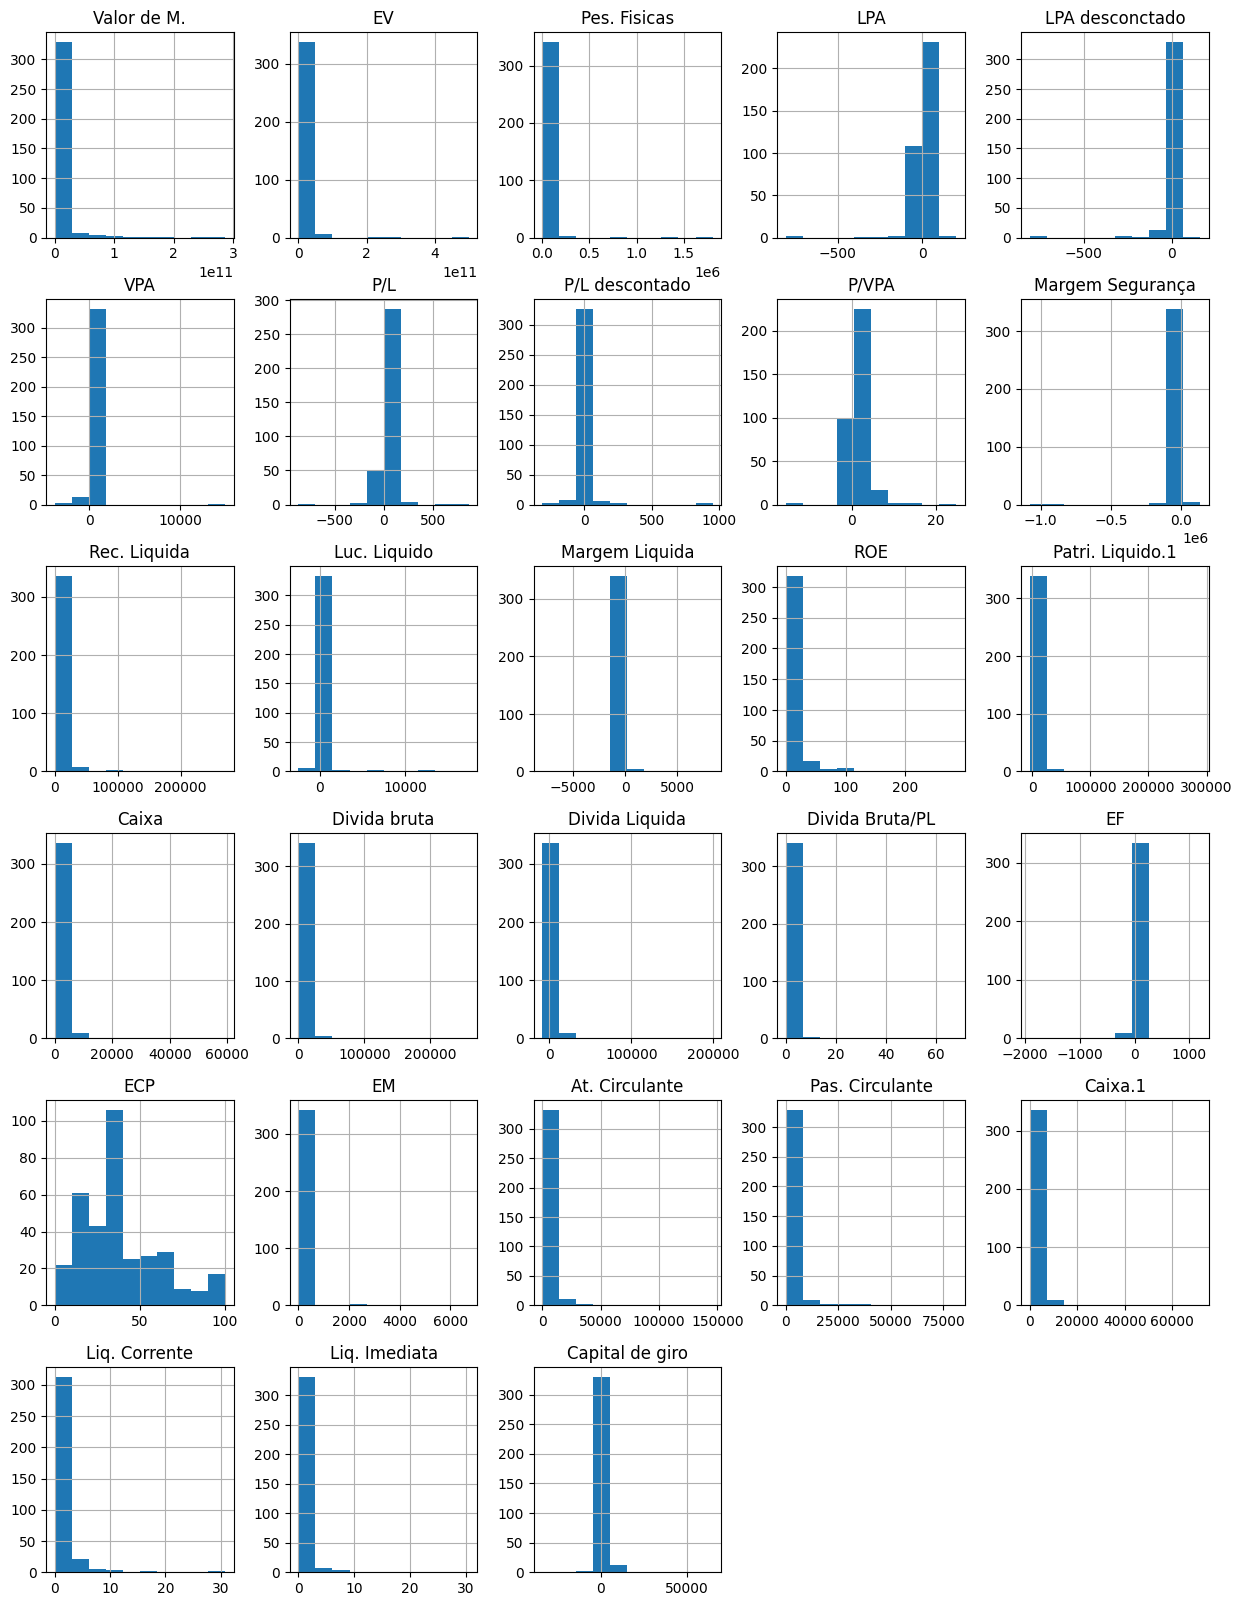

In [168]:
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax=eixo)

<Axes: >

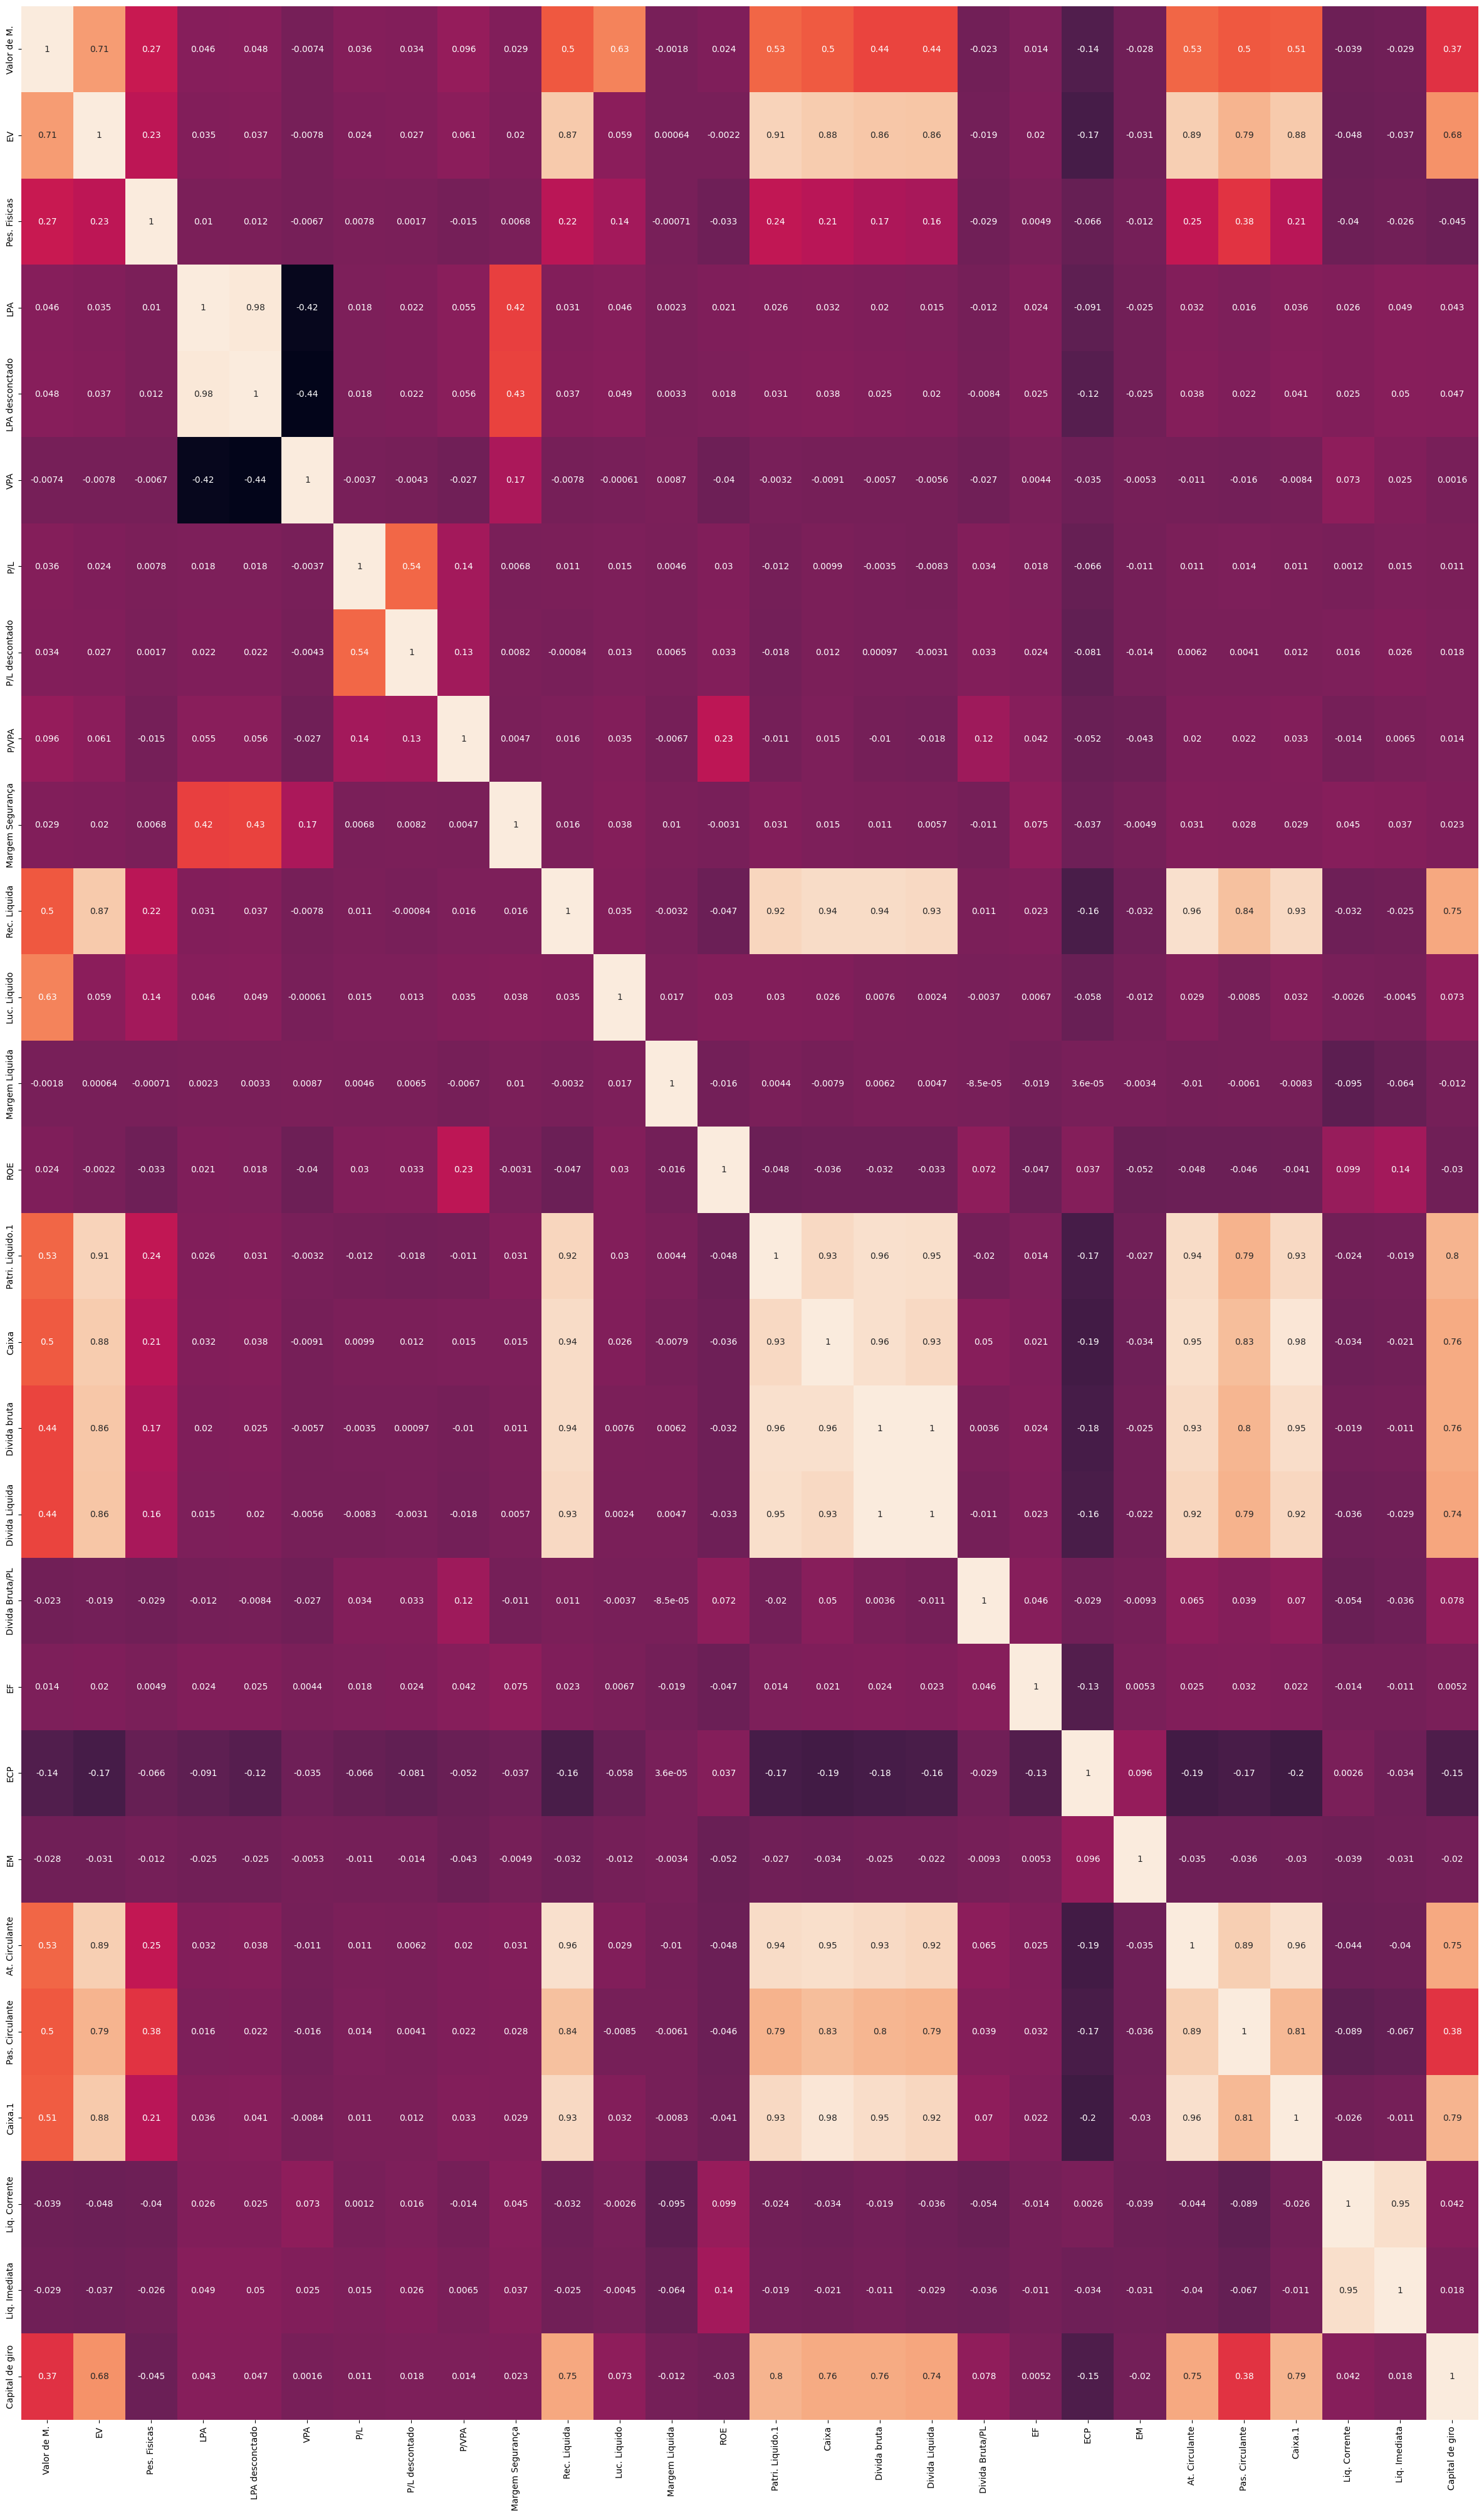

In [169]:
# CALCULANDO A CORRELAÇÃO ENTRE AS COLUNAS
# 1 indica correlação perfeita, como uma variável influencia em outra
# 1 pode induzir o algoritmo a erros
# Correlação negativa indica que uma variavel aumenta se outra diminui
# Correlação de um atributo dele com ele mesmo é sempre 1

# Seleciona apenas as colunas numéricas
numeric_columns = dataset.select_dtypes(include=[float, int])

# Remove a coluna 'Situação' se ela existir
if 'Situação' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Situação'])

# Cria o heatmap de correlação
plt.figure(figsize=(30, 50))
sns.heatmap(numeric_columns.corr(), annot=True, cbar=False)

In [170]:
dataset.drop(['Rec. Liquida', 'Caixa'], axis = 1, inplace = True)

<Axes: >

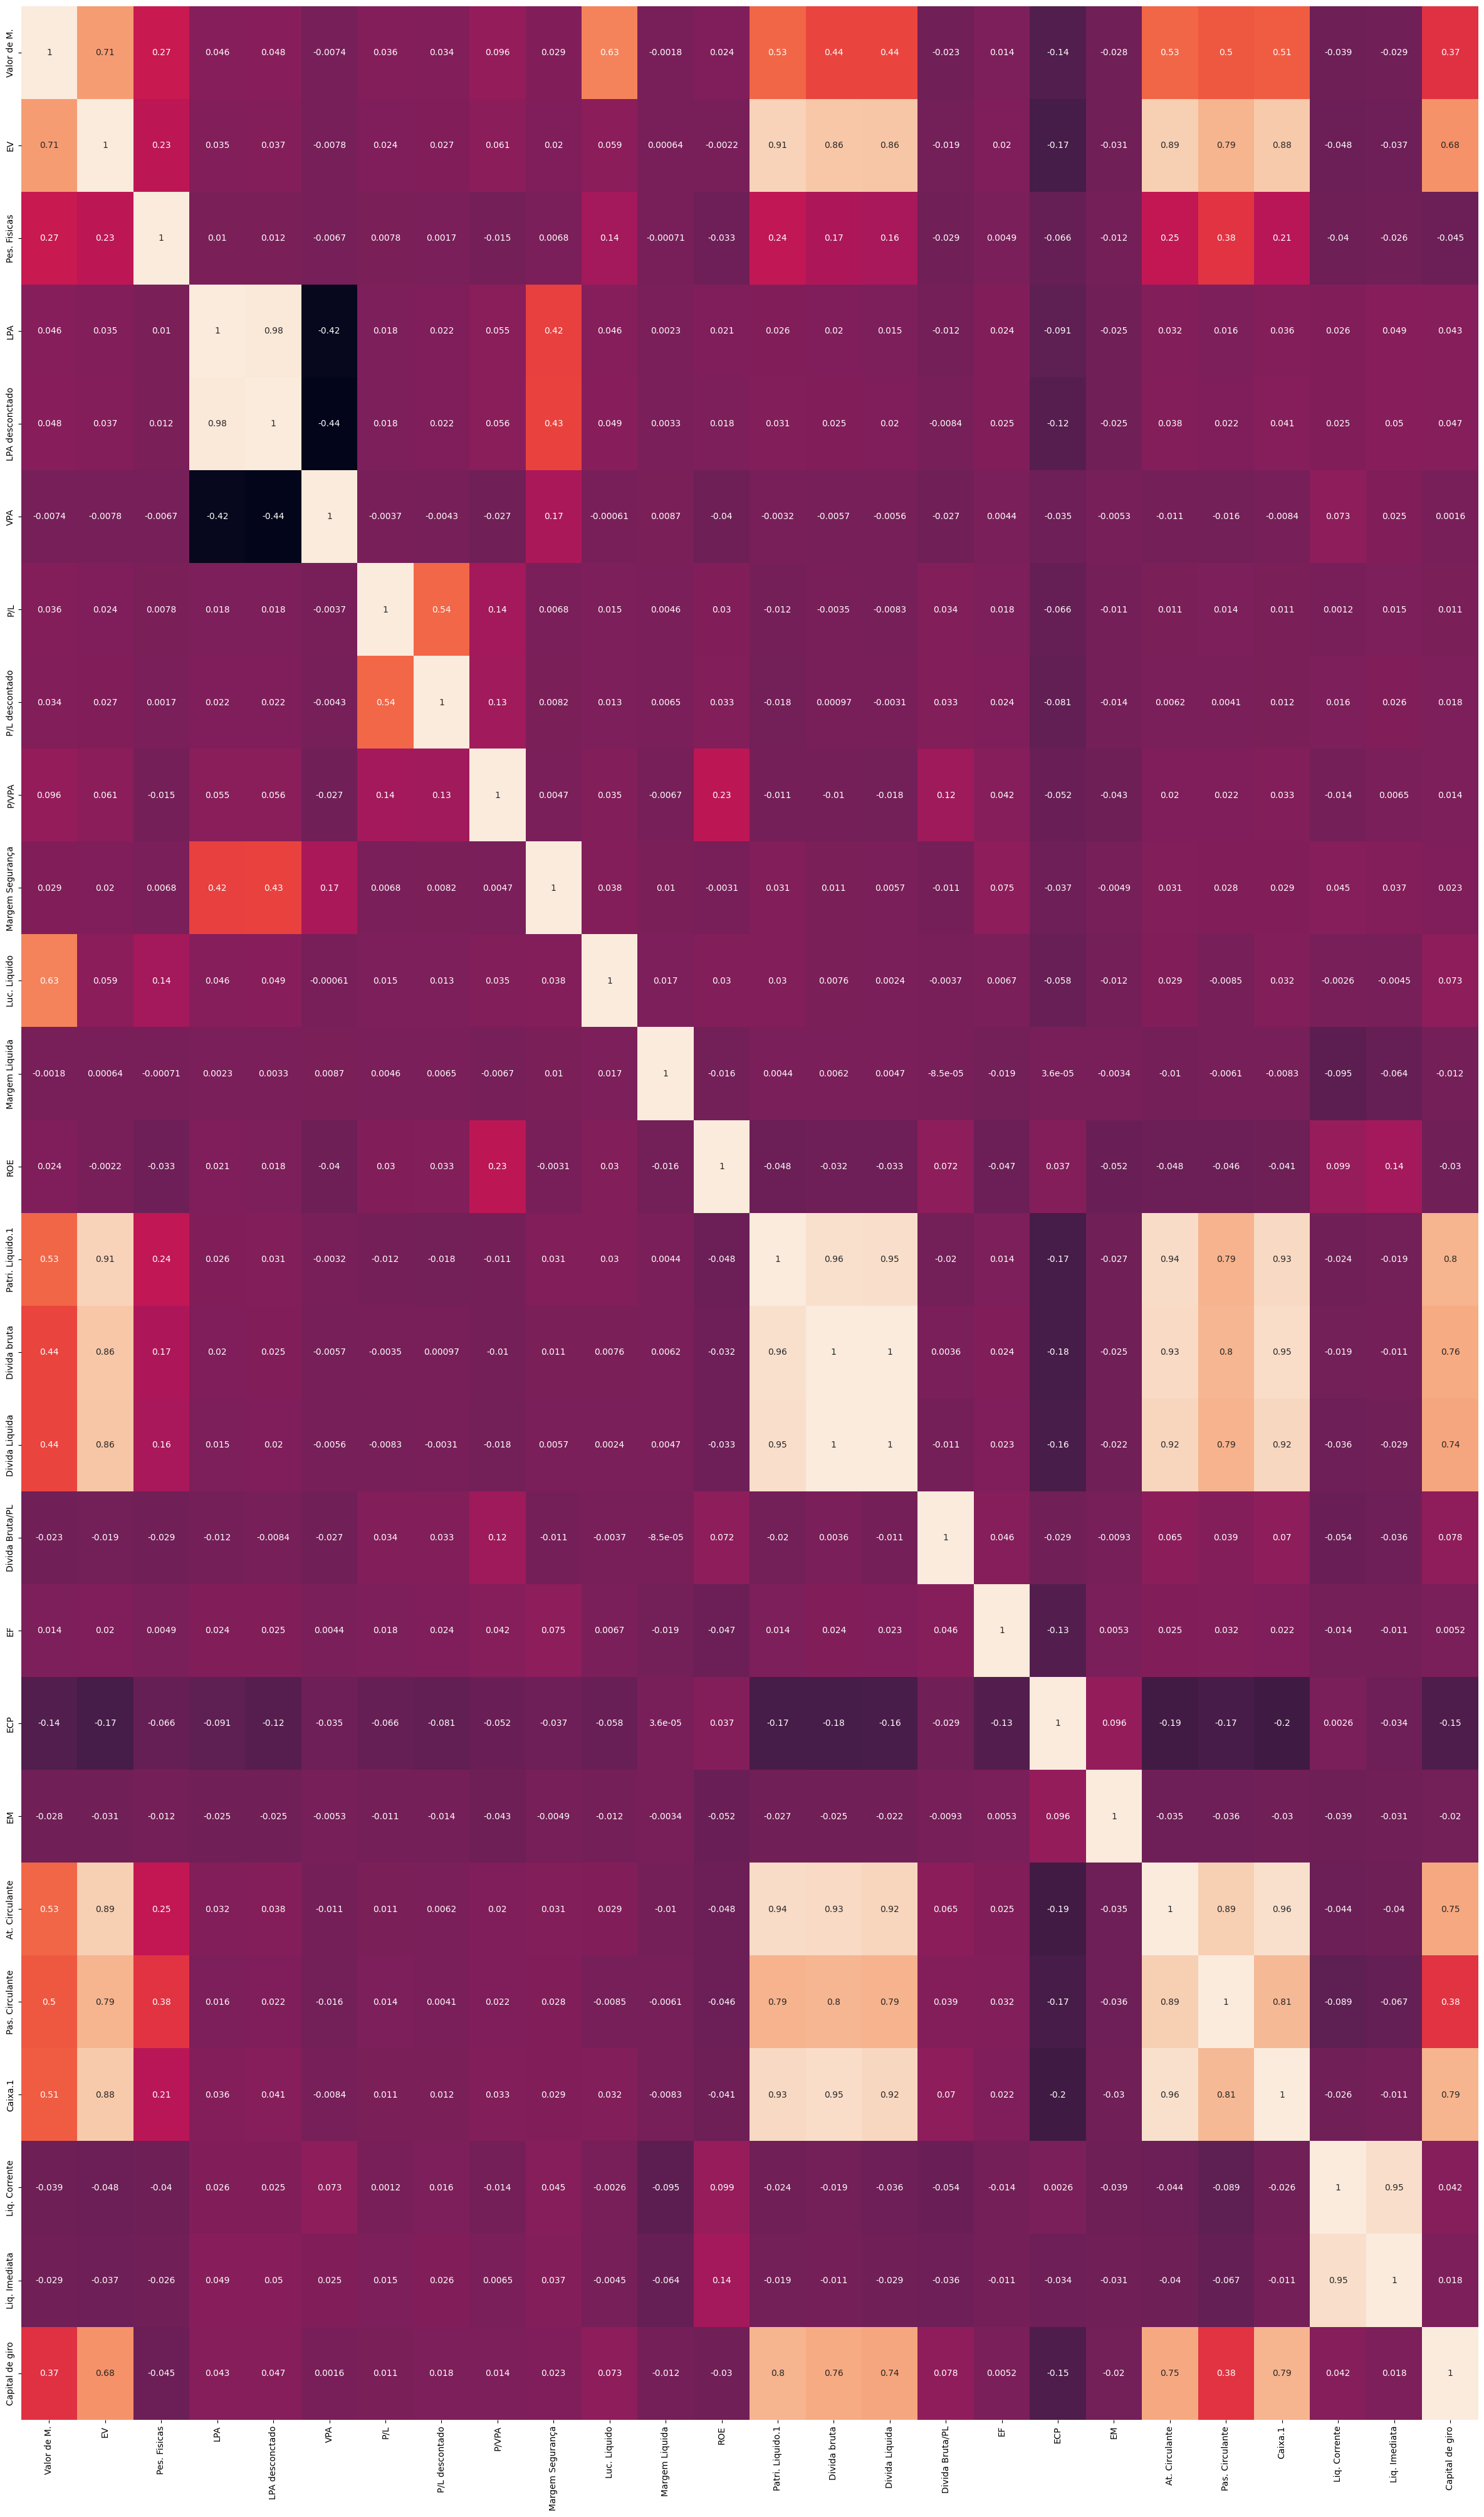

In [171]:
# Seleciona apenas as colunas numéricas
numeric_columns = dataset.select_dtypes(include=[float, int])

# Remove a coluna 'Situação' se ela existir
if 'Situação' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Situação'])

# Cria o heatmap de correlação
plt.figure(figsize=(30, 50))
sns.heatmap(numeric_columns.corr(), annot=True, cbar=False)

In [172]:
dataset.drop(['Divida bruta', 'LPA', 'Caixa.1'], axis = 1, inplace = True)

In [173]:
dataset.drop(['At. Circulante', 'Liq. Corrente'], axis = 1, inplace = True)

<Axes: >

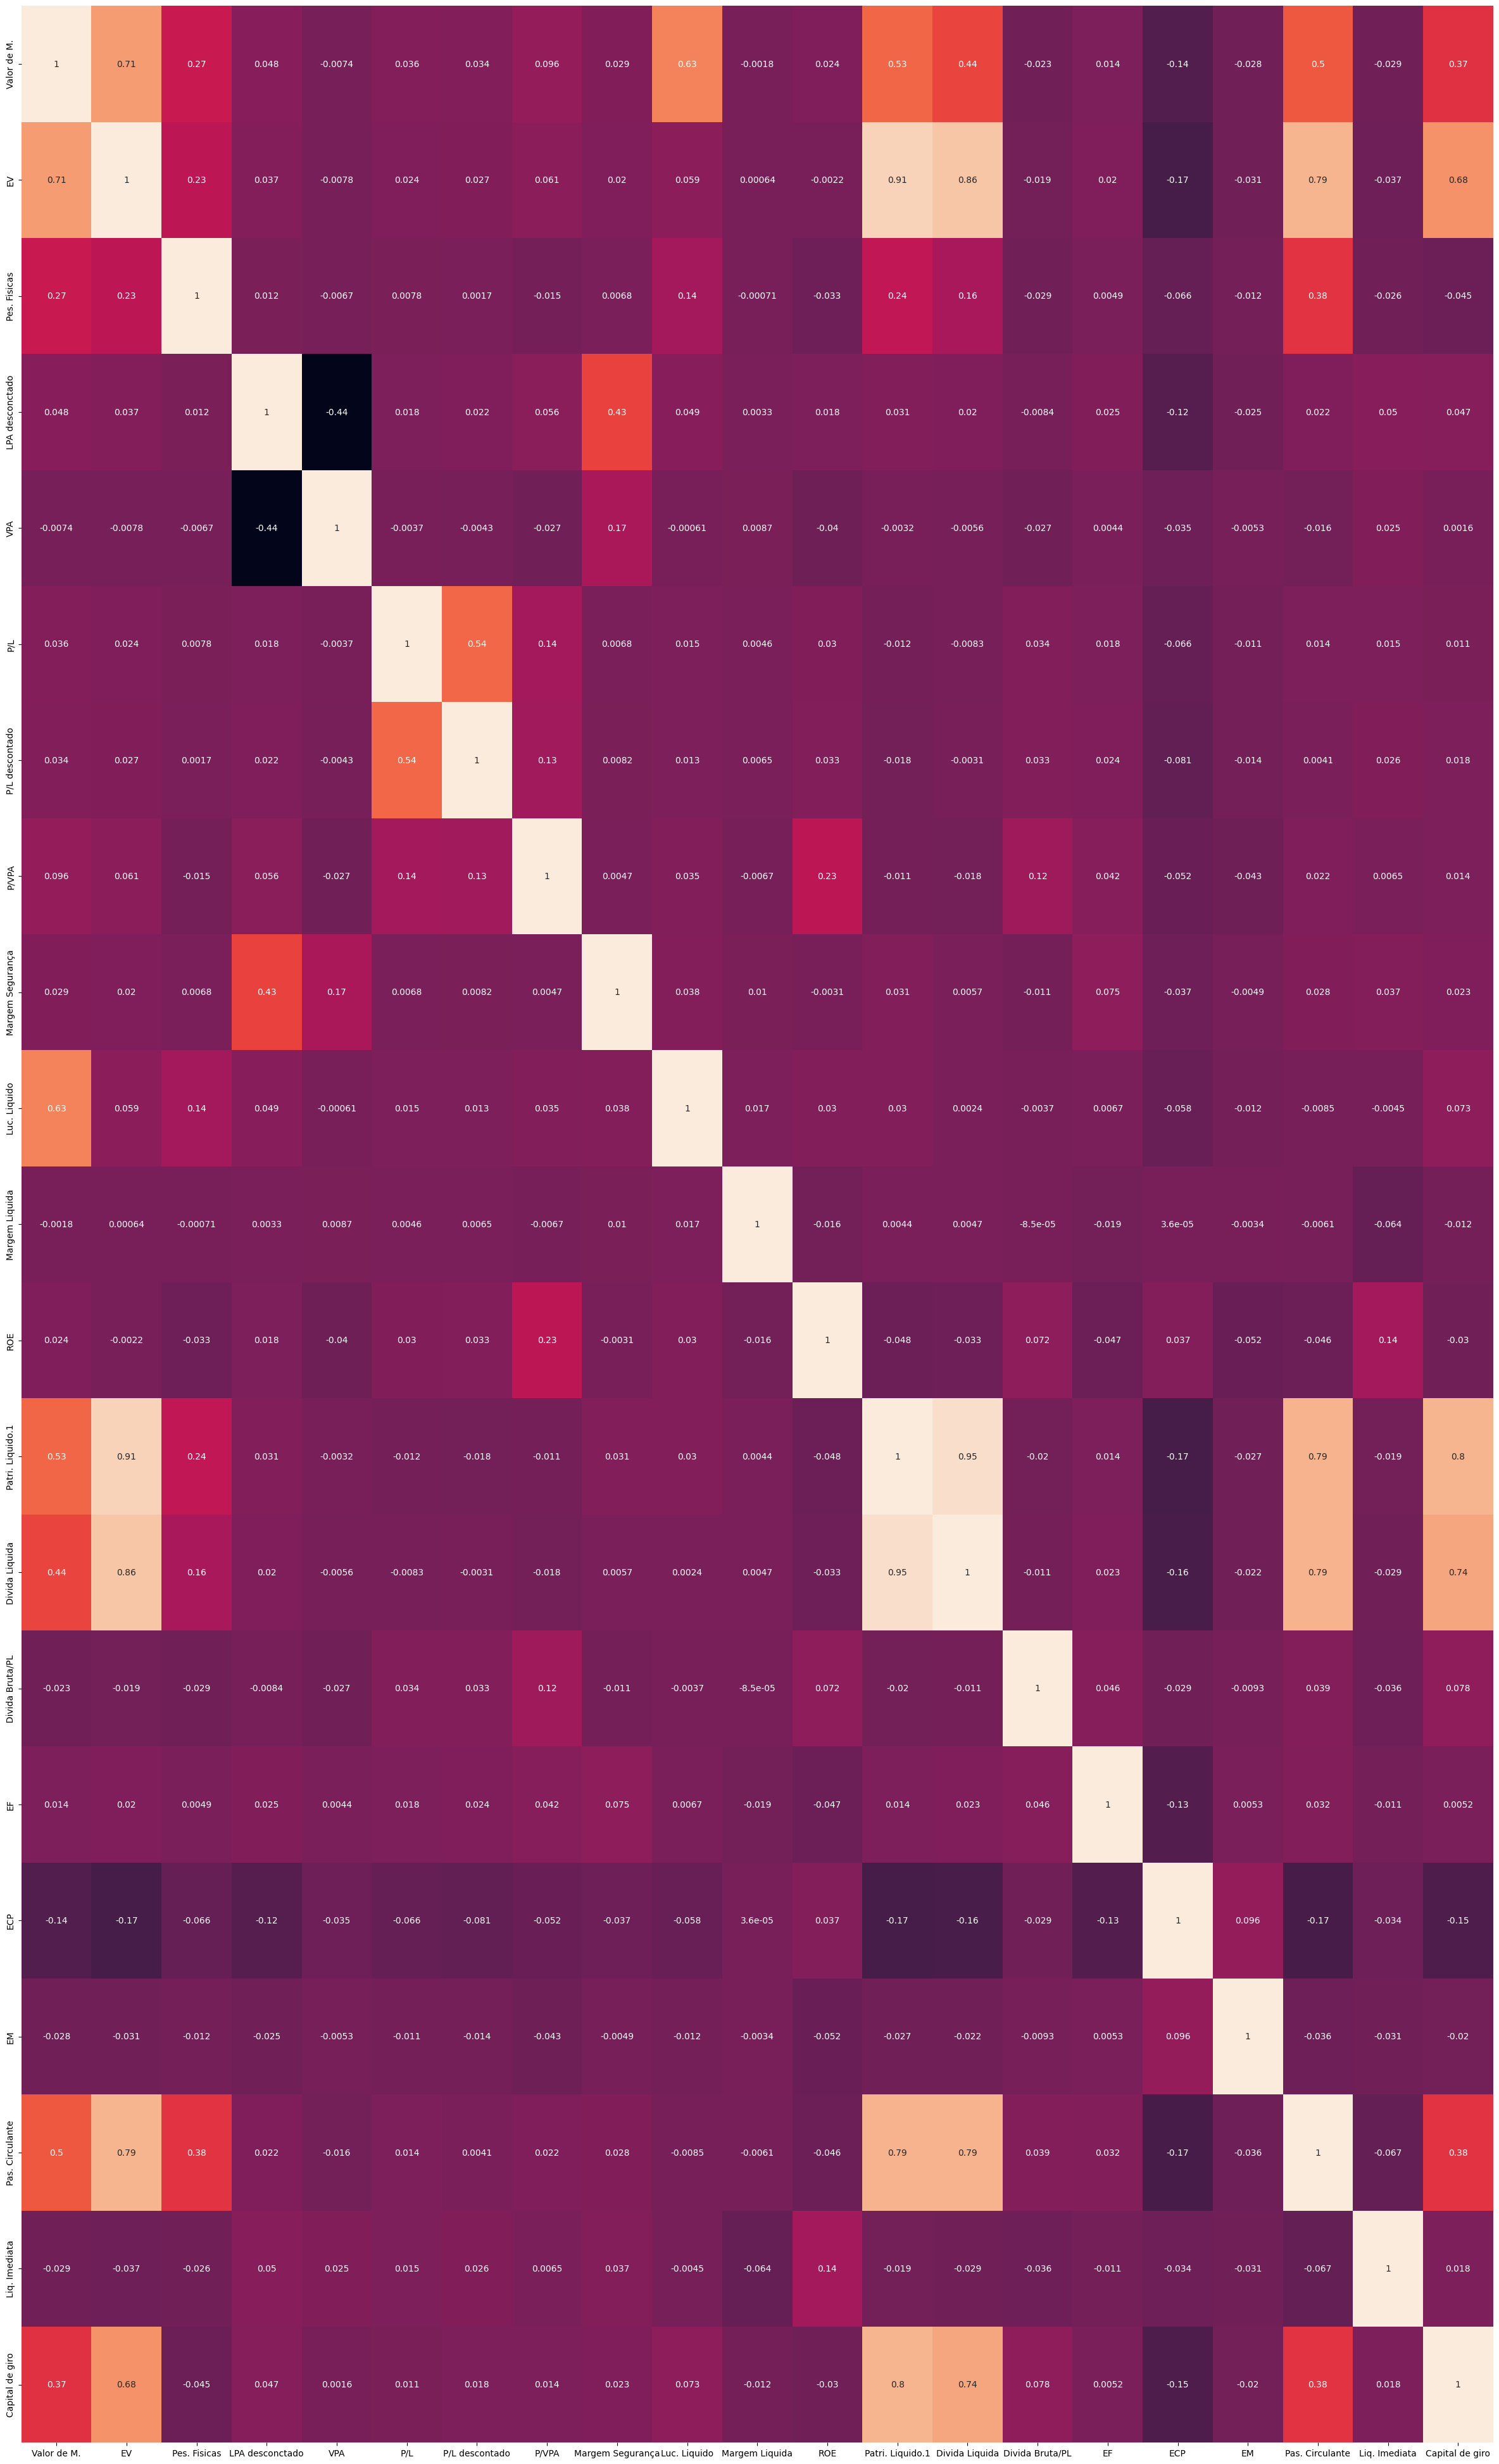

In [174]:
# FORAM APAGADOS ALGUNS ATRIBUTOS QUE ERAM CALCULADOS POR OUTROS
# NOTA-SE QUE A QUANTIDADE DE QUADROS BRANCOS DIMINUIU
# INFORMAÇÕES IMPORTANTES PODEM SER TIRADAS DO GRÁFICO ABAIXO, COMO A CORRELAÇÃO NEGATIVA DE LPA DESCONTADO E VPA

# Seleciona apenas as colunas numéricas
numeric_columns = dataset.select_dtypes(include=[float, int])

# Remove a coluna 'Situação' se ela existir
if 'Situação' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Situação'])

# Cria o heatmap de correlação
plt.figure(figsize=(30, 50))
sns.heatmap(numeric_columns.corr(), annot=True, cbar=False)

In [175]:
dataset.head(1)

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,...,20.66,2012.0,1567.0,0.86,49.0,11.0,3.94,4508.0,0.12,102.0


In [176]:
# VARIAVEIS DUMMY
# aéreo - 0
# turismo - 1
# bebidas - 2
# 1 0 0
# 0 1 0
# 0 0 1

# SÃO IMPORTANTES PARA PREPARAR OS DADOS PARA ENVIAR AOS ALGORITMOS

In [177]:
y = dataset['Situação'].values
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [178]:
empresa = dataset['Empresa']
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [179]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat

,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado
...,...,...
372,eletrodomesticos,dividendos
373,serviços de apoio e armazenagem,alerta
374,material de transporte,alerta
375,outros,alerta


In [180]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
X_cat[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [182]:
X_cat.shape

(347, 90)

In [183]:
dataset_original = dataset.copy()

In [184]:
dataset.drop(['Segmento', 'Categoria', 'Situação', 'Empresa'], axis = 1, inplace=True)

In [185]:
X_cat = pd.DataFrame(X_cat)

In [186]:
dataset.index = X_cat.index

In [187]:
dataset = pd.concat([dataset, X_cat], axis=1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [188]:
# NORMALIZAÇÃO DOS ATRIBUTOS ENTRE 0 E 1 
# normalizar os dados pode ajudar a melhorar a eficiência, a interpretabilidade e a robustez dos modelos de aprendizado de máquina, 
# especialmente em algoritmos sensíveis à escala das características. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Convertendo todos os nomes das colunas para strings
dataset.columns = dataset.columns.astype(str)
dataset_normalizado = scaler.fit_transform(dataset)

In [189]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [190]:
X = dataset_normalizado.copy()

# X = atributos previsores
# y = classes

In [191]:
# É preciso ter uma base de dados histórica para que os algoritmos possam treinar.
# A partir do treinamento, o algoritmo conseguira fazer classificações

In [192]:
# VALIDAÇÃO CRUZADA define as divisões na base de dados
# NÃO É UM ALGORITMO. É UMA FORMA DE SE TRABALHAR E DIMINUIR OS ERROS
# k = número de divisões
# k é muito usado como 10 (A base é dividida em 10 pedaços)


# EXEMPLO K = 4
# Serão reaizados 4 treinamentos para evitar erros do algoritmo por um dado ficar em teste.
# Assim todos os registros irão participar do treinamento e do teste
# Depois será feita uma média dos resultados.


In [193]:
# ÁRVORE DE DECISÃO
# O algoritmo vai analisar todos os dados e gerar uma árvore de decisão para classificar os dados de teste
# São realizados os cálculos de entropia e ganho de informação. 

In [194]:
# REDES NEURAIS ARTIFICIAIS
# O objetivo é encontrar os valores de peso de cada categoria
# Função Soma faz valor da categoria * peso
# Função de ativação vai classificar. O comum é 1 ou 0

In [195]:
# REDES NEURAIS ARTIFICIAIS - REDES MULTICAMADA
# O objetivo também é encontrar os melhores pesos.
# Encontrar as relações matemáticas
# Todos os valores de categoria e os pesos irão se encontrar, criando várias camadas escondidas com uma função soma e uma de ativação.
# Depois vai haver uma camada final com uma função soma e uma função de ativação. A função soma irá receber os valores vindo das camadas escondidas com seus pesos.
# A função de ativação final é quem realmente vai dar a classificação.


In [196]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [197]:
(347 + 3) / 2

175.0

In [198]:
# se os valores de scores.mean() estiverem mais próximos de 1, significa que o modelo está obtendo uma alta precisão média em todas as dobras. 
# Isso indica que o modelo é capaz de generalizar bem para novos dados e que está capturando padrões importantes nos dados de treinamento.
# Se os valores de scores.mean() estiverem mais próximos de 0, significa que o modelo está tendo dificuldade em aprender os padrões nos dados de treinamento e está fazendo previsões aleatórias ou muito ruins.

resultados_forest = []
resultados_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i) # A cada vez que rodar, as divisões serão diferentes. Os resultados também serão.
    # É calculada a média de 10 pedaços 30 vezes 
    # O que está acontecendo: é chamado o algoritmo. É passada a base de dados normalizada com os valores da classe ("Situação"). É passada a quant. de intervalos.
    # O algoritmo deve aprender a classificar com base na "Situação"
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest.append(scores.mean())

    network = MLPClassifier(hidden_layer_sizes=(175,175)) # São duas camadas ocultas com 175 neurônios cada
    scores = cross_val_score(network, X, y, cv = kfold)
    resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)



'\nresultados_forest = []\nresultados_neural = []\n\nfor i in range(30):\n    kfold = KFold(n_splits=10, shuffle=True, random_state=i) # A cada vez que rodar, as divisões serão diferentes. Os resultados também serão.\n    # É calculada a média de 10 pedaços 30 vezes \n    # O que está acontecendo: é chamado o algoritmo. É passada a base de dados normalizada com os valores da classe ("Situação"). É passada a quant. de intervalos.\n    # O algoritmo deve aprender a classificar com base na "Situação"\n    random_forest = RandomForestClassifier()\n    scores = cross_val_score(random_forest, X, y, cv = kfold)\n    resultados_forest.append(scores.mean())\n\n    network = MLPClassifier(hidden_layer_sizes=(175,175)) # São duas camadas ocultas com 175 neurônios cada\n    scores = cross_val_score(network, X, y, cv = kfold)\n    resultados_neural.append(scores.mean())\n\nresultados_forest = np.array(resultados_forest)\nresultados_neural = np.array(resultados_neural)\n'

In [199]:
resultados_neural

In [200]:
resultados_forest

In [201]:
resultados_forest.mean(), resultados_neural.mean()

# Quanto maior, mais o algoritmo consegue interpretar bem a base de dados e pode ser usado para analises futuras

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [203]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2)

In [204]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [205]:
previsoes = random_forest.predict(X_teste)
previsoes

array(['boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'boa',
       'boa', 'ruim', 'ruim', 'boa', 'boa', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'medio',
       'medio', 'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'boa', 'ruim', 'boa',
       'medio', 'medio', 'ruim', 'ruim', 'medio'], dtype=object)

In [206]:
accuracy_score(y_teste, previsoes)

0.6857142857142857

In [207]:
cm = confusion_matrix(y_teste, previsoes)
cm

# Os acertos ficam na diagonal principal

array([[16,  3,  4],
       [ 5,  3,  8],
       [ 0,  2, 29]], dtype=int64)

In [208]:
(11 + 5 + 29)/70

0.6428571428571429

In [209]:
random_forest.classes_

array(['boa', 'medio', 'ruim'], dtype=object)

<Axes: >

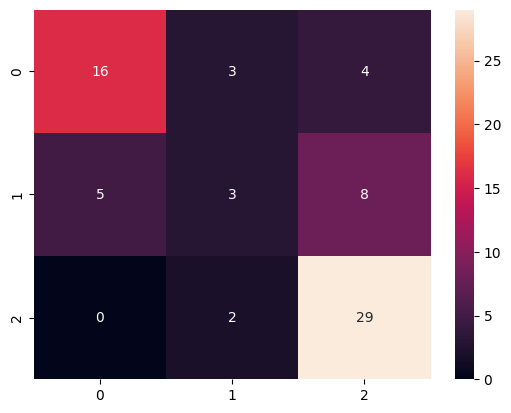

In [210]:
sns.heatmap(cm, annot=True)
# As linhas indicam a 'Situação' e as colunas trazem o número de acertos e erros.

In [211]:
print(classification_report(y_teste, previsoes))
# f1-score é importante quando a quantidade de dados em cada categoria é desbalanceada.
# f1 é uma combinação de precision e recall
# precision é o quanto o algoritmo tem certeza

              precision    recall  f1-score   support

         boa       0.76      0.70      0.73        23
       medio       0.38      0.19      0.25        16
        ruim       0.71      0.94      0.81        31

    accuracy                           0.69        70
   macro avg       0.61      0.61      0.59        70
weighted avg       0.65      0.69      0.65        70



In [212]:
X_teste[0].reshape(1,-1) # É preciso transformar em matriz para enviar ao algoritmo. Dois colchetes.

array([[9.50513965e-02, 5.38378150e-02, 6.76046156e-03, 8.34522038e-01,
        2.03655034e-01, 5.15498223e-01, 2.65845502e-01, 4.97026759e-01,
        8.89220178e-01, 1.40720123e-01, 4.88518406e-01, 5.95592615e-02,
        3.11232178e-02, 4.30698564e-02, 1.05882353e-02, 6.29451396e-01,
        3.40000000e-01, 1.87439194e-04, 4.03863687e-02, 4.75409836e-02,
        4.03818509e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [213]:
random_forest.predict(X_teste[12].reshape(1,-1))

array(['ruim'], dtype=object)

In [214]:
random_forest.feature_importances_
# O maior valor indica o parâmetro mais importante para definir a classe/'Situação'

array([6.22691391e-02, 3.42162726e-02, 3.36148033e-02, 7.08971212e-02,
       4.79104021e-02, 4.53152315e-02, 3.61039557e-02, 4.75814430e-02,
       5.08441552e-02, 5.42207152e-02, 3.54122491e-02, 3.70266022e-02,
       4.25761169e-02, 3.64896945e-02, 3.15399185e-02, 3.30251878e-02,
       3.53297309e-02, 4.06137654e-02, 3.23347395e-02, 3.48016573e-02,
       3.22104607e-02, 0.00000000e+00, 3.68694804e-03, 8.91587888e-04,
       1.29899950e-03, 1.53666567e-03, 2.09761084e-06, 1.16540155e-03,
       1.96106749e-04, 1.78419638e-04, 6.85585283e-04, 2.78122489e-03,
       1.51288616e-05, 1.07214452e-03, 0.00000000e+00, 3.49270087e-04,
       1.81140626e-03, 0.00000000e+00, 0.00000000e+00, 2.02527905e-04,
       1.88357761e-05, 3.57716208e-04, 9.75148458e-04, 4.00746555e-04,
       2.85821365e-03, 2.36828866e-03, 5.85711034e-04, 5.61119255e-03,
       2.00463610e-06, 6.51078393e-06, 4.03357337e-04, 1.42187440e-04,
       2.15435708e-03, 1.41169619e-03, 1.16895704e-03, 9.16116836e-05,
      

In [215]:
np.argmax(random_forest.feature_importances_)

3

In [216]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
    print(nome, '=', importancia)

Valor de M. = 0.06226913914805357
EV = 0.03421627258564705
Pes. Fisicas = 0.03361480333161749
LPA desconctado = 0.0708971212194185
VPA = 0.04791040207758865
P/L = 0.04531523148968897
P/L descontado = 0.03610395569432906
P/VPA = 0.04758144295016053
Margem Segurança = 0.050844155159821366
Luc. Liquido = 0.05422071521160581
Margem Liquida = 0.03541224910436267
ROE = 0.037026602188139544
Patri. Liquido.1 = 0.042576116899205624
Divida Liquida = 0.03648969453250166
Divida Bruta/PL = 0.03153991849243933
EF = 0.033025187790552836
ECP = 0.03532973086201531
EM = 0.04061376541457395
Pas. Circulante = 0.03233473949039728
Liq. Imediata = 0.034801657294346956
Capital de giro = 0.03221046072708402
0 = 0.0
1 = 0.0036869480392351297
2 = 0.0008915878877075425
3 = 0.0012989994982071707
4 = 0.0015366656740609939
5 = 2.0976108439664914e-06
6 = 0.00116540155001812
7 = 0.00019610674927387253
8 = 0.00017841963843933658
9 = 0.000685585282750629
10 = 0.002781224892369211
11 = 1.5128861580474457e-05
12 = 0.00107

In [217]:
caracteristicas = dataset.columns
caracteristicas

Index(['Valor de M.', 'EV', 'Pes. Fisicas', 'LPA desconctado', 'VPA', 'P/L',
       'P/L descontado', 'P/VPA', 'Margem Segurança', 'Luc. Liquido',
       ...
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89'],
      dtype='object', length=111)

In [218]:
importancias = random_forest.feature_importances_
importancias

array([6.22691391e-02, 3.42162726e-02, 3.36148033e-02, 7.08971212e-02,
       4.79104021e-02, 4.53152315e-02, 3.61039557e-02, 4.75814430e-02,
       5.08441552e-02, 5.42207152e-02, 3.54122491e-02, 3.70266022e-02,
       4.25761169e-02, 3.64896945e-02, 3.15399185e-02, 3.30251878e-02,
       3.53297309e-02, 4.06137654e-02, 3.23347395e-02, 3.48016573e-02,
       3.22104607e-02, 0.00000000e+00, 3.68694804e-03, 8.91587888e-04,
       1.29899950e-03, 1.53666567e-03, 2.09761084e-06, 1.16540155e-03,
       1.96106749e-04, 1.78419638e-04, 6.85585283e-04, 2.78122489e-03,
       1.51288616e-05, 1.07214452e-03, 0.00000000e+00, 3.49270087e-04,
       1.81140626e-03, 0.00000000e+00, 0.00000000e+00, 2.02527905e-04,
       1.88357761e-05, 3.57716208e-04, 9.75148458e-04, 4.00746555e-04,
       2.85821365e-03, 2.36828866e-03, 5.85711034e-04, 5.61119255e-03,
       2.00463610e-06, 6.51078393e-06, 4.03357337e-04, 1.42187440e-04,
       2.15435708e-03, 1.41169619e-03, 1.16895704e-03, 9.16116836e-05,
      

In [219]:
indices = np.argsort(importancias)
indices

array([ 37,  77,  81,  38,  34,  84,  21,  74,  75,  48,  26,  49,  32,
        40,  70,  86,  62,  55,  57,  66,  88,  51,  58,  61,  76,  29,
        85, 105,  28,  95,  39, 101,  69,  99,  94,  68,  35,  41,  64,
        43,  50,  87,  82, 104,  65,  46, 103,  67,  60,  90,  30,  23,
       100,  73,  42,  93,  33,  98,  97,  89,  27,  54,  56, 102,  59,
        91,  24,  96,  78,  53,  63,  25,  72,  92,  36, 110,  80,  52,
        79,  45,  83,  31,  44,  71,  22, 107,  47, 108, 109, 106,  14,
        20,  18,  15,   2,   1,  19,  16,  10,   6,  13,  11,  17,  12,
         5,   7,   4,   8,   9,   0,   3], dtype=int64)

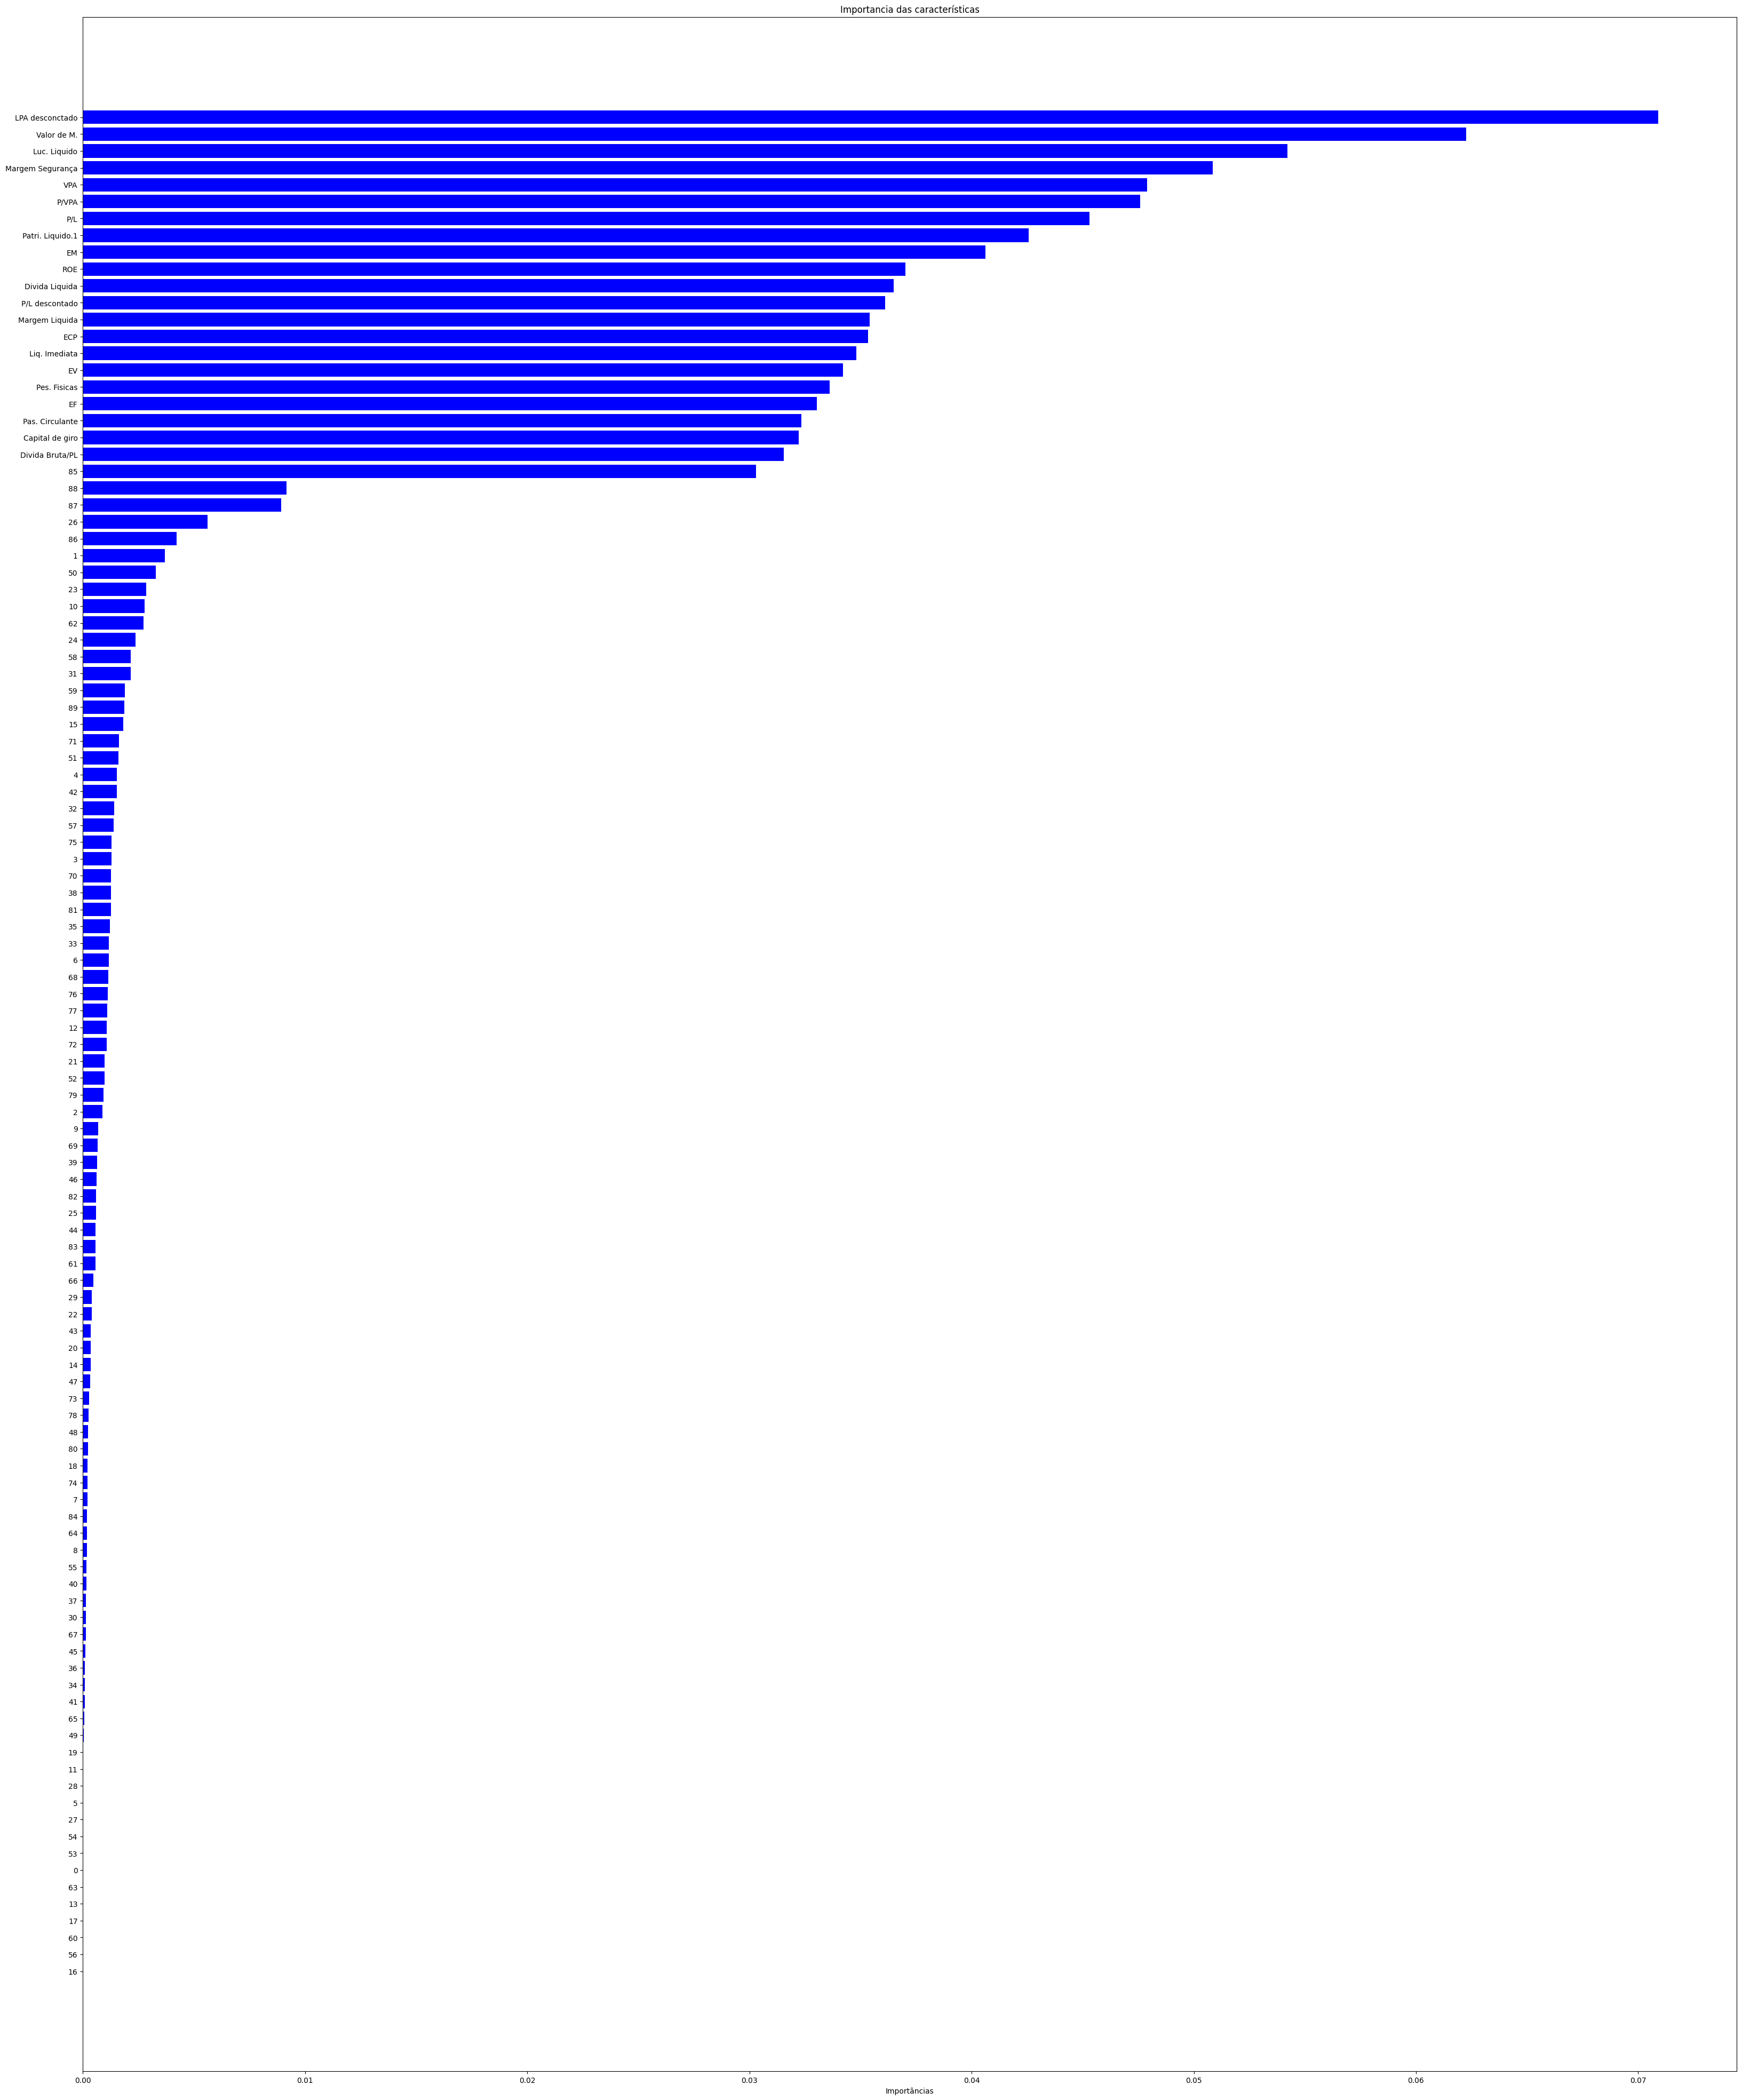

In [220]:
plt.figure(figsize=(40,50))
plt.title('Importancia das características')
plt.barh(range(len(indices)), importancias[indices], color='b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')
plt.show()

In [221]:
import pickle

In [222]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [223]:
with open('bases_classificacao.pkl', 'wb') as f:
    pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

In [224]:
parametros = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 100, 150]
}

In [225]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [226]:
# MELHORANDO A ARVORE DE DECISAO USANDO GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X,y)
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print(best_params, best_scores)

{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 50} 0.6658385093167702


In [227]:
with open('bases_classificacao.pkl', 'rb') as f:
    dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [228]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [229]:
dataset_original

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,...,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,...,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,...,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,...,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,...,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,...,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,...,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,...,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,...,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [230]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [231]:
###############################################################################################################
# AGRUPAMENTO
# Segmentar grupos
# Uso de k-means
# Primeiro se define a quantidade dos clusters/grupos. Derão definidos os pontos centrais dos grupos. Depois é definido até que distancia um termo vai pertencer a tal grupo

In [232]:
from sklearn.cluster import KMeans

In [233]:
# MÉTODO DO COTOVELO PARA CALCULAR AS DISTANCIAS
# Quanto maior a distancia, pior é o agrupamento do centroide
# wcss = within cluster sum of squares
wcss = [] # serão feitos os calculos das distancias até o centro do cluster para cada cluster e isso será elevado ao quadrado. O ideal é ter valores pequenos de distancia
faixa = range(1, 21)
for i in faixa:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [234]:
print(wcss)

[549.5537304637771, 477.7054710014376, 408.72459198760623, 392.4412600264513, 396.7924817610795, 345.7293128185893, 349.0956566999995, 325.4463930933447, 324.12576553650524, 311.7084805162658, 294.5861648200394, 286.364059955327, 287.35523988985307, 286.4088272453347, 285.36304490711325, 274.603810550563, 253.66851622799578, 252.41223676797028, 249.33945217605213, 253.80678502845268]


Text(0, 0.5, 'WCSS')

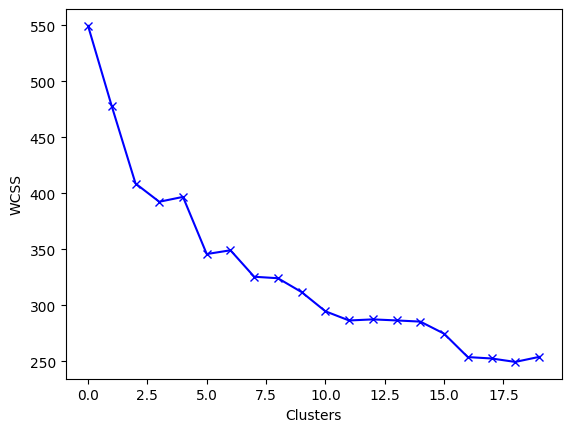

In [235]:
# O gráfico sempre muda porque a escolha dos centroides é aleatoria, então as posições e distancias irão mudar
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
# Deve ser escolhido o valor de clusters que cause uma variação pequeno no gráfico abaixo.
# Na aula ficou um pouco diferente do que fiz. 

In [276]:
clus = 6

In [277]:
kmeans = KMeans(n_clusters=clus)
kmeans.fit(X)

KMeans(n_clusters=6)

In [278]:
labels = kmeans.labels_
labels, len(labels)

(array([2, 4, 2, 2, 1, 0, 0, 0, 1, 2, 3, 4, 3, 1, 0, 0, 1, 0, 3, 5, 0, 3,
        5, 1, 0, 0, 1, 1, 1, 4, 1, 0, 0, 0, 0, 4, 0, 5, 4, 4, 4, 4, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 4,
        0, 0, 3, 2, 4, 2, 3, 2, 0, 3, 4, 2, 4, 0, 2, 2, 4, 2, 1, 1, 4, 2,
        2, 1, 3, 1, 5, 4, 3, 3, 0, 2, 3, 1, 0, 5, 1, 0, 3, 3, 1, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 4, 0, 0, 3, 5, 1, 3, 0, 1,
        0, 3, 1, 0, 0, 4, 0, 2, 4, 4, 0, 0, 4, 2, 0, 2, 2, 0, 3, 5, 5, 5,
        0, 0, 0, 1, 1, 2, 1, 4, 0, 0, 3, 3, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 3, 5, 3, 0, 1, 3, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 5, 0, 3, 0, 0, 5, 2, 1, 0, 4, 0, 1, 0, 0, 0, 1,
        5, 0, 0, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        0, 4, 0, 0, 1, 4, 3, 4, 4, 0, 3, 0, 4, 0, 0, 0, 0, 4, 1, 0, 0, 0,
        5, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 5, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 

In [279]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([177,  48,  25,  41,  37,  19], dtype=int64))

In [280]:
kmeans.cluster_centers_

array([[ 1.94521988e-02,  2.04789419e-02,  7.68794333e-03,
         8.22562463e-01,  2.02658276e-01,  5.01431177e-01,
         2.53813718e-01,  4.12193608e-01,  8.77005354e-01,
         1.28020108e-01,  4.87991513e-01,  5.67182980e-02,
         3.13192959e-02,  5.82004534e-02,  3.28000683e-02,
         6.28987124e-01,  3.61242384e-01,  1.09660804e-02,
         3.73646444e-02,  2.89898683e-02,  3.54367578e-01,
         5.64971751e-03,  1.69491525e-02,  5.64971751e-03,
         1.12994350e-02,  6.07153217e-18,  5.64971751e-03,
         5.64971751e-03,  2.25988701e-02,  1.12994350e-02,
         1.12994350e-02,  6.21468927e-02,  3.03576608e-18,
         6.07153217e-18,  5.64971751e-03,  1.12994350e-02,
         2.25988701e-02,  3.03576608e-18,  3.03576608e-18,
         1.12994350e-02,  5.64971751e-03,  1.12994350e-02,
         5.64971751e-03,  1.12994350e-02,  9.03954802e-02,
         1.12994350e-02,  1.12994350e-02, -1.11022302e-16,
         5.64971751e-03,  3.03576608e-18,  3.03576608e-1

In [281]:
centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=[dataset.columns])
centroides
# Os dados a seguir são as médias para cada linha e coluna

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,0.019452,0.020479,0.007688,0.822562,0.202658,0.501431,0.253814,0.412194,0.877005,0.128020,...,5.649718e-03,1.129944e-02,5.649718e-03,3.035766e-18,3.035766e-18,1.000000e+00,1.040834e-16,-1.110223e-16,2.081668e-16,6.071532e-18
1,0.092151,0.035921,0.012434,0.835668,0.204321,0.509163,0.257351,0.441675,0.888709,0.192410,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,0.016671,0.018382,0.005652,0.834145,0.204464,0.510562,0.250310,0.417361,0.885140,0.127368,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
3,0.007443,0.005903,0.001121,0.798624,0.221059,0.502737,0.248780,0.412780,0.887025,0.125641,...,8.673617e-19,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,8.673617e-19
4,0.041554,0.024360,0.054521,0.835910,0.204834,0.539215,0.281843,0.472134,0.890179,0.147508,...,8.673617e-19,8.673617e-19,2.702703e-02,2.702703e-02,4.336809e-19,0.000000e+00,-1.387779e-17,-8.326673e-17,9.729730e-01,2.702703e-02
5,0.027904,0.016908,0.006327,0.834525,0.204341,0.513945,0.264132,0.437428,0.888904,0.135795,...,5.263158e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.473684e-01,2.775558e-17,-1.387779e-17,5.263158e-02


In [282]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data=centroides, columns=[dataset.columns])
centroides
# Nota-se como as empresas estão organizadas. LPA é um atributo importante

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,5.576804e+09,1.021118e+10,13867.920210,-10.880171,-14.880700,-0.257012,8.831357,1.036134,-14882.152457,54.752334,...,5.649718e-03,1.129944e-02,5.649718e-03,3.035766e-18,3.035766e-18,1.000000e+00,1.040834e-16,-1.110223e-16,2.081668e-16,6.071532e-18
1,2.641881e+10,1.793046e+10,22427.625000,1.798271,16.208333,13.102499,13.305388,2.225992,-672.510528,1336.682500,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,4.779383e+09,9.162879e+09,10195.170726,0.325480,18.892880,15.520399,4.399545,1.244704,-5006.335254,41.767754,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
3,2.133854e+09,2.924597e+09,2022.372394,-34.039612,329.234195,1.999262,2.464331,1.059786,-2716.846537,7.390244,...,8.673617e-19,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,8.673617e-19
4,1.191322e+10,1.215153e+10,98341.358599,2.033243,25.804054,65.031622,44.284827,3.455341,1112.109423,442.733721,...,8.673617e-19,8.673617e-19,2.702703e-02,2.702703e-02,4.336809e-19,0.000000e+00,-1.387779e-17,-8.326673e-17,9.729730e-01,2.702703e-02
5,7.999955e+09,8.425884e+09,11414.000000,0.693000,16.594842,21.365788,21.882032,2.054611,-436.471123,209.535709,...,5.263158e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.473684e-01,2.775558e-17,-1.387779e-17,5.263158e-02


In [283]:
len(labels), len(empresa)

(347, 347)

In [284]:
empresa.isna().sum()

0

In [285]:
empresa.shape

(347,)

In [ ]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster


In [ ]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

In [288]:
categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        115
                          1.0         26
                          2.0         20
                          3.0         29
                          4.0         23
                          5.0         14
crescimento               0.0          7
                          1.0          3
                          3.0          4
                          4.0          3
crescimento moderado      0.0         24
                          1.0         12
                          2.0          1
                          3.0          2
                          4.0          3
                          5.0          1
dividendos                0.0         12
                          1.0          4
                          2.0          4
                          3.0          3
                          4.0          6
                          5.0          2
dividendos + crescimento  0.0          2
Name: cluster, dtype: i

In [289]:
situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0        36
          1.0        16
          2.0         6
          3.0         6
          4.0        13
          5.0         4
medio     0.0        40
          1.0        12
          2.0         8
          3.0        10
          4.0         4
          5.0         6
ruim      0.0        84
          1.0        17
          2.0        11
          3.0        22
          4.0        18
          5.0         7
Name: cluster, dtype: int64

In [290]:
pd.set_option('display.max_rows', None)
segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster

Segmento                                    cluster
acessorios                                  0.0         2
agricultura                                 0.0         3
                                            4.0         1
agua e saneamento                           0.0         1
                                            2.0         1
                                            3.0         2
alimentos                                   0.0         3
                                            4.0         1
aluguel de carros                           0.0         1
                                            3.0         1
armas e munições                            1.0         1
artefatos de cobre                          0.0         1
artefatos de ferro e aço                    0.0         2
                                            2.0         1
                                            3.0         1
                                            4.0         1
automoveis e motocic

In [291]:
# PCA = ANALISE DOS COMPONENTES PRINCIPAIS
from sklearn.decomposition import PCA

In [292]:
pca = PCA(n_components=2) # Junta as variaveis relacionadas em uma só
componentes = pca.fit_transform(X)
componentes


array([[-2.75371422e-01,  5.45708241e-01],
       [ 8.19667857e-01,  1.17432516e+00],
       [-2.98875193e-01,  5.07039457e-01],
       [-2.81480235e-01,  5.27281643e-01],
       [ 1.03169003e+00, -6.60007139e-01],
       [-3.38568275e-01, -4.16567599e-02],
       [-3.56719192e-01, -4.07534059e-02],
       [-3.50335694e-01, -3.52772437e-02],
       [ 9.04650247e-01, -5.93812854e-01],
       [-2.77094853e-01,  5.41610842e-01],
       [-3.51329011e-01, -2.13270615e-02],
       [ 7.34019349e-01,  5.33231467e-01],
       [-3.93265749e-01, -9.82878477e-02],
       [ 9.74965061e-01, -5.77750140e-01],
       [-3.99552366e-01, -8.86833694e-02],
       [-3.31532656e-01,  2.69588699e-03],
       [ 9.81654300e-01,  4.93061319e-02],
       [-3.30136442e-01, -8.20708565e-04],
       [-4.19271180e-01, -1.43930390e-01],
       [ 6.96558632e-01, -6.54634058e-02],
       [-3.74519572e-01, -7.67006641e-02],
       [-4.00633449e-01, -9.19771574e-02],
       [ 5.66626220e-01,  4.34593995e-02],
       [ 1.

In [293]:
pca_df = pd.DataFrame(data = componentes, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.275371,0.545708
1,0.819668,1.174325
2,-0.298875,0.507039
3,-0.281480,0.527282
4,1.031690,-0.660007


In [294]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.275371,0.545708,2
1,0.819668,1.174325,4
2,-0.298875,0.507039,2
3,-0.281480,0.527282,2
4,1.031690,-0.660007,1


C:\Users\tdw07\AppData\Local\Temp\ipykernel_12972\633335769.py:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette =['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'silver'])


<Axes: xlabel='pca1', ylabel='pca2'>

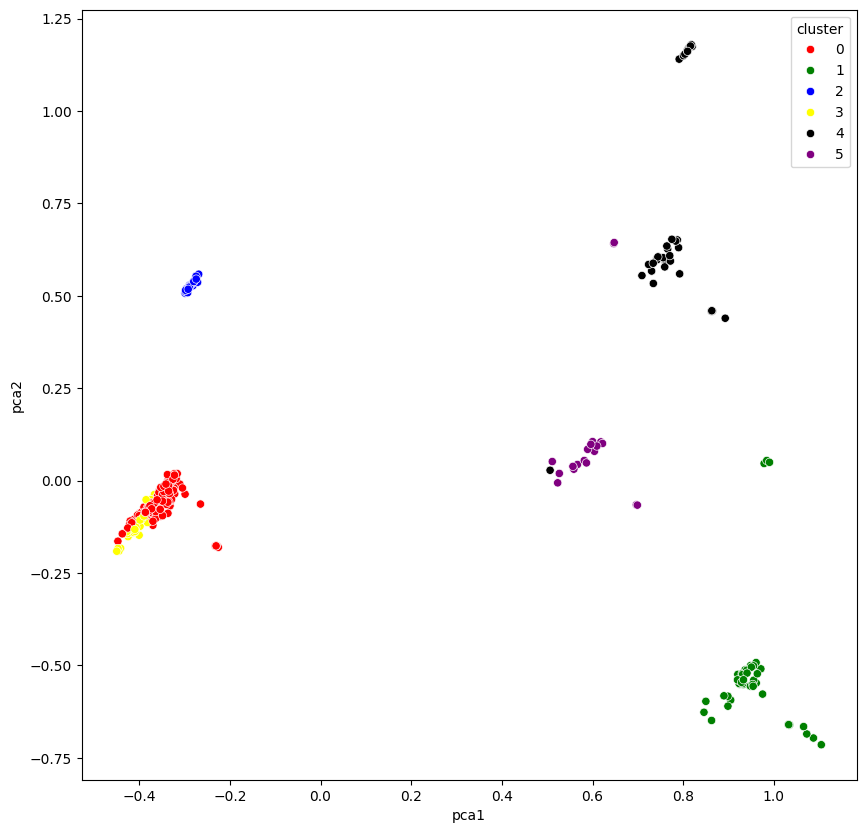

In [295]:
import seaborn as sn
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette =['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'silver'])
